<h1><center>IST 597 Foundations of Deep Learning</center></h1>

---

<h2><center>Assignment 11</center><h2>

**Instructor** : Dr. C. Lee Giles <br>
**TA** : Neisarg Dave, Shaurya Rohatgi
<br><br>

Credits: 

<h3>Course Policy<h3>

Carefully read all the instructions, before you start working on the assignment

* Give maximum explanation for each sub-problems.

* Please avoid single line answers, submissions without any explanations would receive 0 points.

* Late submissions will be graded with 20% discount per day. Day 1 starts immediately after the submission deadline.

* Every assignment has a hard deadline, usually 3 days past the original due date.

* Late submissions (penalty or not) are not accepted after the hard deadline.

* All source materials must be cited. The University Academic Code of Conduct will be strictly enforced.

* We will be creating Canvas submission page for this. Submit all files on Canvas.

* All queries related to Assignment should have a subject line *IST597:Assignment_11 Queries*

---


<h2><center>Convolution Neural Networks</center></h2>

---

#### What is Convolution

3Blue1Brown explains it best:

https://www.youtube.com/watch?v=KuXjwB4LzSA

In practice, especially for images, instead of performing convolution, we perform cross correlation operation (and call it Convolution !!)

What is the difference?
Cross correlation is performing colvolution, but without inverting the kernel function. 

https://en.wikipedia.org/wiki/Cross-correlation

<br>

#### Learnable Convolution Kernels

Convolution Neural Networks are composed of multiple layers of cross-correlation operators with learnable kernels.

<br>

#### Max Pooling

Max pooling is a pooling technique where we select the max value from the image masked by the max pooling kernel. We then slide this kernel across our image, resulting in a smaller image. 

https://www.youtube.com/watch?v=ZjM_XQa5s6s

<br>

#### Conv Layers in PyToch
We will use 2D conv layers and max pool layers from PyTorch to create our model

+ https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
+ https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

---



This assignment has 3 tasks:
1. Training a ConvNet on CIFAR10 dataset
2. Data Augmentation 
3. Adversarial Samples

You can change your model hyperparameters for task 1, keep the model structure same for tasks 2 and 3

You can use inbuilt torch or sklearn functionalities wherever possible.

Provide detailed explaination for each observation.


In [1]:
import torch
import random
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import pprint
from torch.utils.data.dataloader import DataLoader
%matplotlib inline

device = torch.device("cuda:0")

seed = 1234 
random.seed(seed)
torch.manual_seed(seed)

In [4]:
train_dataset = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=T.ToTensor()
)

test_dataset = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=T.ToTensor()
)

val_dataset, train_dataset = torch.utils.data.random_split(train_dataset, [10000, 40000])

print(len(train_dataset), len(val_dataset), len(test_dataset))

Files already downloaded and verified
Files already downloaded and verified
40000 10000 10000


In [5]:
class_to_idx = {
    "airplane"    : 0,
    "automobile"  : 1,
    "bird"        : 2,
    "cat"         : 3,
    "deer"        : 4,
    "dog"         : 5,
    "frog"        : 6,
    "horse"       : 7,
    "ship"        : 8,
    "truck"       : 9
}
idx_to_class = {i:c for c, i in class_to_idx.items()}

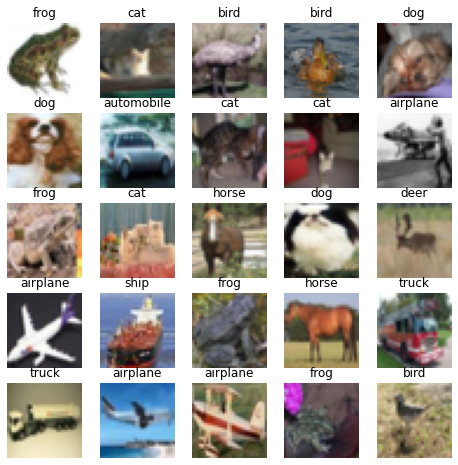

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    label = idx_to_class[label]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0).squeeze())
plt.show()

## Task 1
Train a decently fit (no underfitting or overfitting) neural network on the CIFAR 10 dataset. 
+ Keep track of your validation loss to select the best model
+ You are free to change network hyperparameters and batch size
+ You are free to change optimizer settings and loss function
+ Run your model 5 times with different seeds and report mean and standard deviation of the following metrices on Test Set:
  1. Accuracy for each class
  2. Precision for each class
  3. Recall for each class
  4. F1 score for each class
  5. Visualize the Confusion Matrix (use only mean values for this)



In [49]:
## Sample Classification Network

class ConvolutionNeuralNetwork(torch.nn.Module):
  def __init__(self):
    super(ConvolutionNeuralNetwork, self).__init__()
    self.conv = torch.nn.Sequential(
      torch.nn.Conv2d(3, 64, 5),
      torch.nn.ReLU(),
      torch.nn.Conv2d(64, 128, 5),
      torch.nn.ReLU(),
      torch.nn.MaxPool2d(2,2),
      torch.nn.Conv2d(128, 128, [5,5]),
      torch.nn.ReLU(),
      torch.nn.Conv2d(128, 128, [5,5]),
      torch.nn.ReLU(),
      torch.nn.MaxPool2d(2,2)
    )

    self.fc1 = torch.nn.Linear(512, 128)
    self.fc2 = torch.nn.Linear(128, 128)
    self.fc3 = torch.nn.Linear(128, 10)
  
  def forward(self, data):
    bs = data.shape[0]
    data = self.conv(data)
    data = data.reshape(bs, -1)
    data = torch.relu(self.fc1(data))
    data = torch.relu(self.fc2(data))
    logits = self.fc3(data)
    return logits

In [50]:
batch_size = 1024
train_data = DataLoader(train_dataset, batch_size = batch_size)
test_data = DataLoader(test_dataset, batch_size = batch_size)
val_data = DataLoader(val_dataset, batch_size = batch_size)

loss_fn = torch.nn.CrossEntropyLoss()
model = ConvolutionNeuralNetwork().cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay = 0, momentum = 0.9)

In [ ]:
for epoch in range(50):
  for i, batch_data in enumerate(train_data):
    # Write your training loop here 

  

## Task 2: Data Augmentation

Perform the following data augmentation techniques to increase the number of samples in your train set:

1. Rotate Image at an arbitrary angle 
2. Crop Image from the center and resize
3. Flip Image from left to right (Create a mirror image)

Train your network on the augmented dataset 5 times with different seeds and campare results with previously trained network on Test Set.

In [8]:
#--------------------------
# Write your Code Here
#--------------------------

## Task 3: Adversarial Samples

1. Create a Adversarial Test Set by adding a noise sampled from $\sim\mathcal{N}(\mu = 0, \sigma = 0.01)$ to the given Test Set.
2. Compare models obtained in Task 1 and Task 2 on Adversarial Test Set
3. Augment train set by adding noise to samples from train set. (You should have both normal samples and noise added samples in train set)
4. Train your model 5 times with different seeds on noise augmented train set and report results on normal Test Set and Adversarial Test Set 

In [ ]:
#--------------------------
# Write your Code Here
#--------------------------